# Lab 6: Unsupervised Learning II - Dimensionality Reduction

In this lab, we will cover the following topics:
1. Dimensionality reduction techniques:
   * PCA
   * t-SNE
   * UMAP
2. Visualization and interpretation

Each section includes basic implementation and questions for further exploration.

## 1. Dimensionality Reduction

### 1.1 Principal Component Analysis (PCA)

We will start by implementing PCA for dimensionality reduction. We will also explore different parameters and visualize the results.

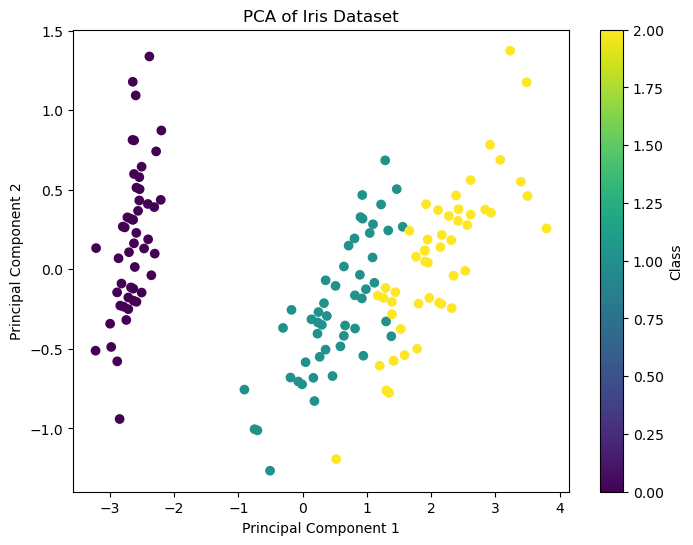

[0.92461872 0.05306648 0.01710261 0.00521218]


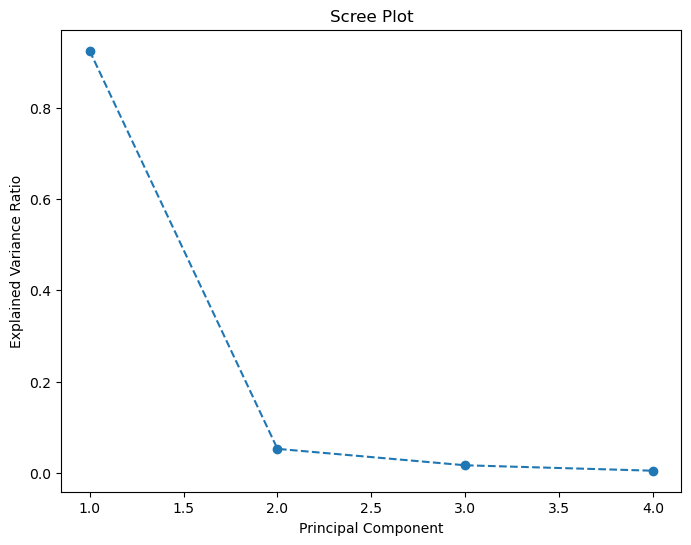

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap #from umap-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

# Scree plot
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--') #range from 1 to number of components 
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

### Questions for Exploration

1. How does changing the number of principal components (`n_components`) affect the explained variance ratio?
-> total explained variance rario increase as number of n_components increase. yet the PC1 variance ratio and PC2 variace ratio remained. 
2. What happens to the visualization when you use more or fewer principal components?
-> fewer PC (2,3D) allow to visualize easier while more PCs might by harder to visualize as its beyond 3D (yet keep most of the variance )
3. How does the choice of dataset affect the PCA results and their interpretation?
PCA is data-sensitive , anything from n_features (more PCs, more complex), feature correlation (more correlation, less PCs explain more ), noises of data (low PCs more noise), PCA only capture linear relationship

In [ ]:
PCA?

### 1.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

Next, we will implement t-SNE for dimensionality reduction. We will also explore different parameters and visualize the results.

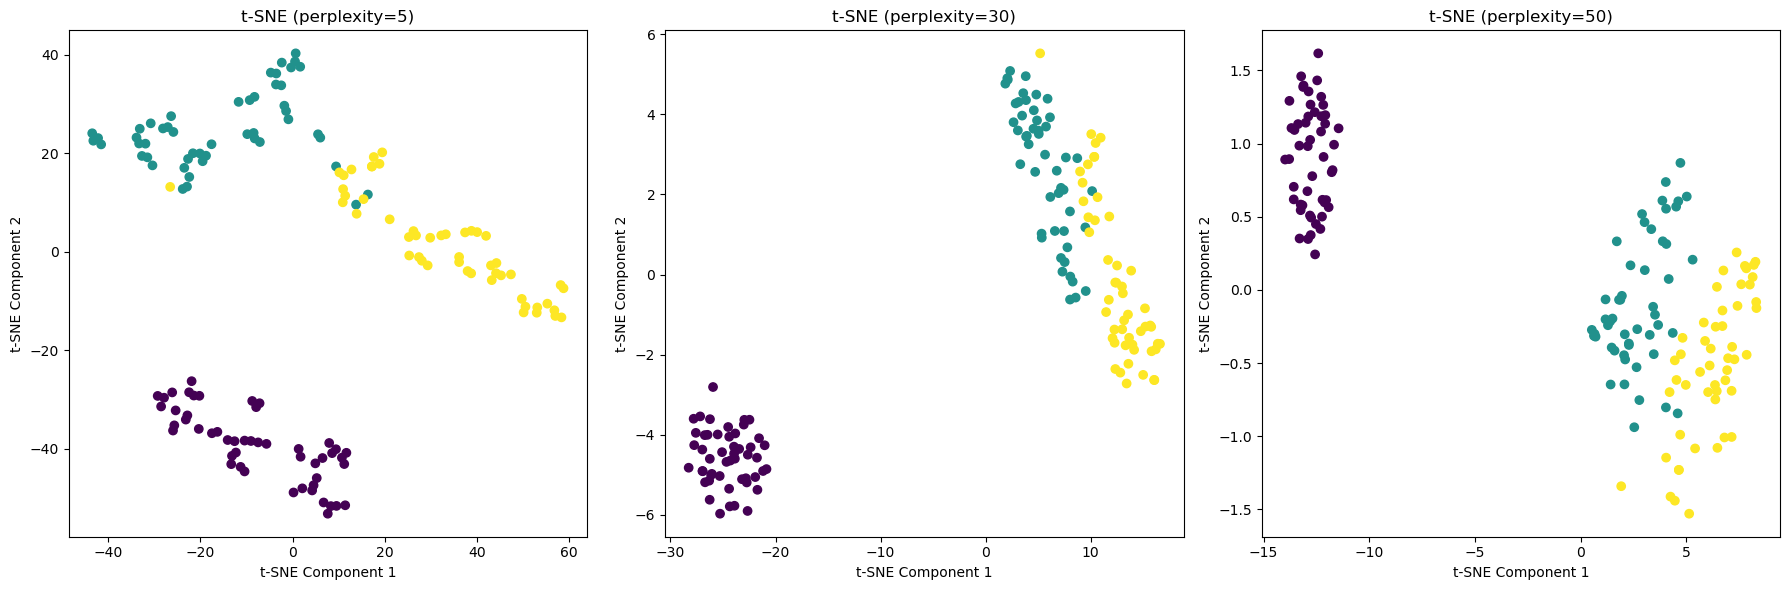

In [ ]:


# Perform t-SNE with different perplexity values
perplexities = [5, 30, 50]
fig, axes = plt.subplots(1, len(perplexities), figsize=(18, 6))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f't-SNE (perplexity={perplexity})')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


### Questions for Exploration

1. How does changing the perplexity parameter affect the t-SNE visualization?
->low perplexity focuses more in the local structure (nearest neighbor), while high perplexity focuses in the global structure 
2. What happens to the visualization when you change the learning rate?
-> The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a 'ball' with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers 
3. How does the choice of dataset affect the t-SNE results and their interpretation? (chatGPT, 2025)
->scale must be standardized, density of clusters, noise or outliers, size of the dataset , best with numerical (not categorical)

### NOTE

Cluster shape and grouping matter
But exact distances between clusters are not meaningful

### 1.3 Uniform Manifold Approximation and Projection (UMAP)

Finally, we will implement UMAP for dimensionality reduction. We will also explore different parameters and visualize the results.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors = 5, silhouette score = 0.6280
n_neighbors = 15, silhouette score = 0.7602


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


n_neighbors = 50, silhouette score = 0.6879


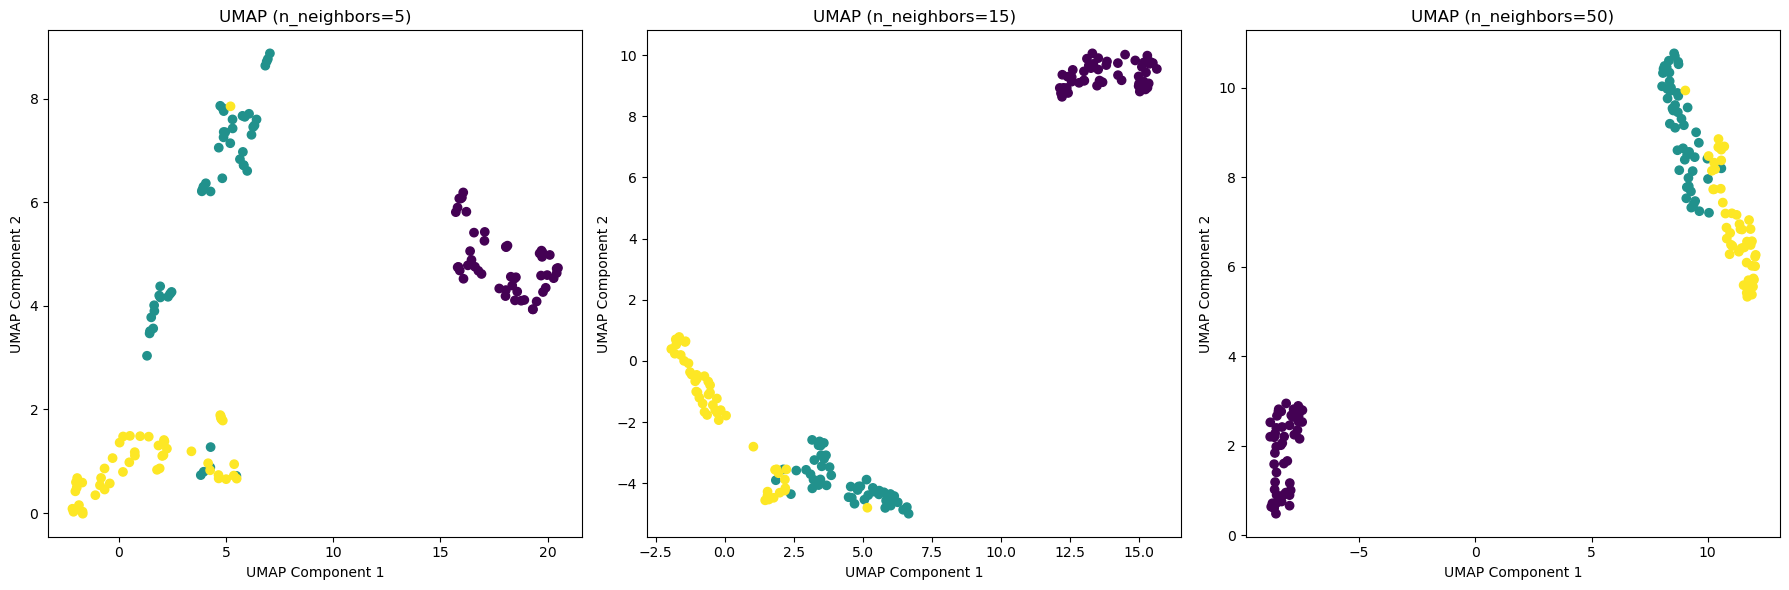

In [ ]:


# Perform UMAP with different n_neighbors values
n_neighbors_values = [5, 15, 50]
fig, axes = plt.subplots(1, len(n_neighbors_values), figsize=(18, 6))

for i, n_neighbors in enumerate(n_neighbors_values):
    umap_reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, random_state=42)
    X_umap = umap_reducer.fit_transform(X)
    
    axes[i].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'UMAP (n_neighbors={n_neighbors})')
    axes[i].set_xlabel('UMAP Component 1')
    axes[i].set_ylabel('UMAP Component 2')
    
    
    ## check for highest silhouette score
        # Define and fit KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)  # Set n_clusters to expected number of groups
    labels = kmeans.fit_predict(X_umap)

    # Evaluate clustering performance
    score = silhouette_score(X_umap, labels)
    print(f"n_neighbors = {n_neighbors}, silhouette score = {score:.4f}")

plt.tight_layout()
plt.show()




### Questions for Exploration

1. How does changing the number of neighbors (`n_neighbors`) affect the UMAP visualization?
-> small neighbor focuses on local structure, while high neighbor focuses on the global structure 
2. What happens to the visualization when you change the minimum distance (`min_dist`)?
-> The effective minimum distance between embedded points. Smaller values will result in a more clustered/clumped embedding where nearby points on the manifold are drawn closer together, while larger values will result on a more even dispersal of points. The value should be set relative to the spread value, which determines the scale at which embedded points will be spread out
3. How does the choice of dataset affect the UMAP results and their interpretation?
Affects whether clusters form clearly or blend; scaling matters: from n_features, n_neighbors, scaling, normalization, size of the data

### note
UMAP learns structure directly from the data, so dataset properties matter a lot.

## 2. Visualization and Interpretation

We will visualize and interpret the results of different dimensionality reduction techniques. We will also explore different visualization techniques.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


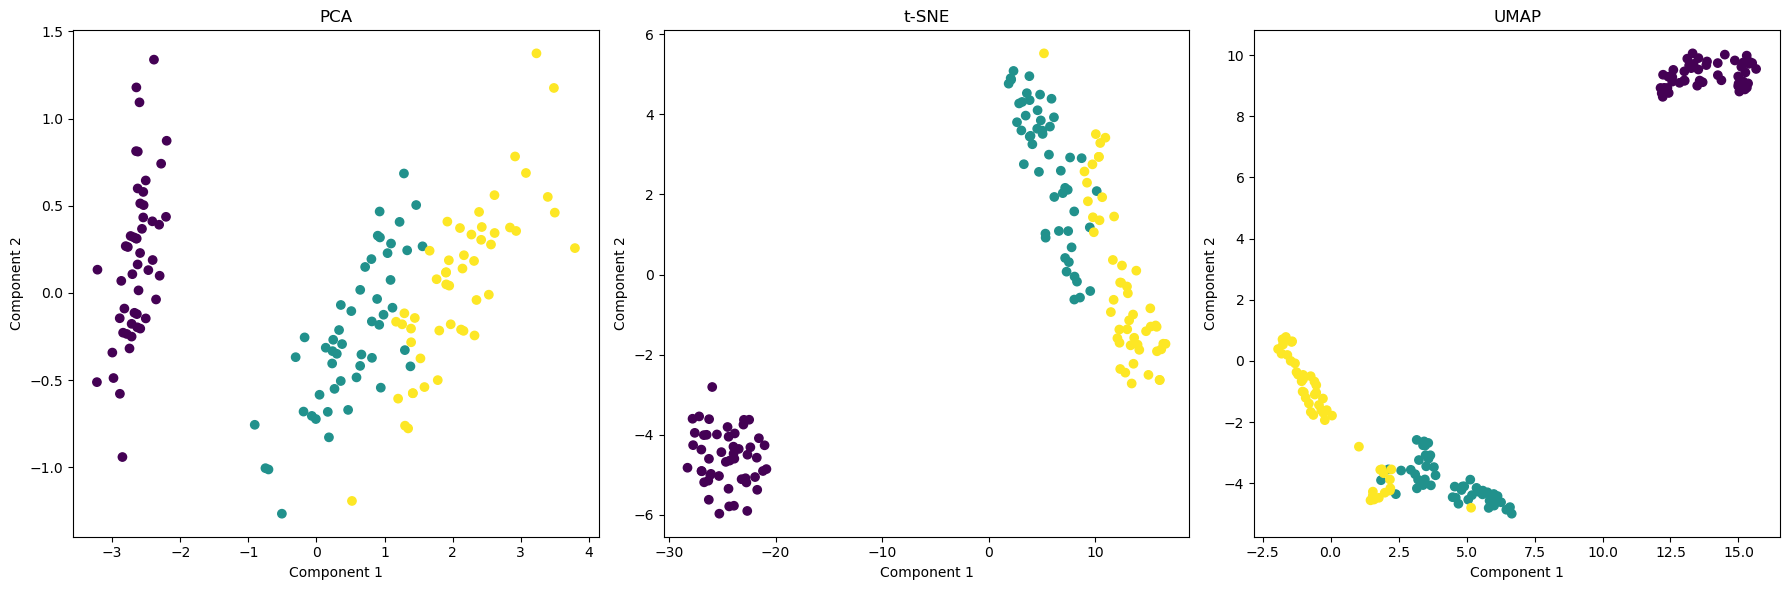

PCA silhouette score = 0.5977
t_SNE silhouette score = 0.6604
UMAP silhouette score = 0.7602


In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Perform UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axes[0].set_title('PCA')
axes[0].set_xlabel('Component 1')
axes[0].set_ylabel('Component 2')

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
axes[1].set_title('t-SNE')
axes[1].set_xlabel('Component 1')
axes[1].set_ylabel('Component 2')

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis')
axes[2].set_title('UMAP')
axes[2].set_xlabel('Component 1')
axes[2].set_ylabel('Component 2')

plt.tight_layout()
plt.show()

#EXPLORE
# Evaluate clustering performance for each technique - kmeans and silhouette score
techniques = {'PCA':X_pca,
              't_SNE': X_tsne,
              'UMAP': X_umap}
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for name, tec in techniques.items():
    kmeans = KMeans(n_clusters=3, random_state=42)  # Set n_clusters to expected number of groups
    labels = kmeans.fit_predict(tec)

    # Evaluate clustering performance
    score = silhouette_score(tec, labels)
    print(f"{name} silhouette score = {score:.4f}")


### Questions for Exploration

1. How do the visualizations of PCA, t-SNE, and UMAP compare?
-> PCA:	Shows overall trends but may miss complex shapes
t-SNE: Global distances distorted (clusters may be spread or rotated arbitrarily)
UMAP : Keeps relative distances + cluster shape better than t-SNE . may help to see any connection/relationship between clusters

2. What are the strengths and weaknesses of each dimensionality reduction technique?
-> PCA: Fast, interpretable, preserves global variance || Can't handle non-linear patterns, sensitive to scaling
t_SNE : Great for local clustering visualization || Slow on large datasets, distorts global structure, can’t transform new data
UMAP: Balances local + global structure, fast, scalable	|| Sensitive to parameters, less interpretable axes
3. How does the choice of parameters affect the visualization and interpretation of each technique?
-> PCA : n_components , Controls how much variance is preserved. Lower = less info, but easier to visualize.
t_SNE : perlexibility , Controls balance between local/global: low = local, high = more global layout
UMAP : n_neighbors, mid_dist, Low = fine clusters, tight cluster; high = smooth global layout, more spread 

## Extensions

1. Apply clustering algorithms (e.g., k-Means) on the reduced dimensions obtained from PCA, t-SNE, and UMAP.
    * How do the clustering results compare when using different dimensionality reduction techniques?
2. Use quantitative metrics (e.g., trustworthiness, continuity) to evaluate the quality of the dimensionality reduction.
    * How do PCA, t-SNE, and UMAP compare based on these metrics?
Handling High-Dimensional Data
3. Use PCA to reduce noise in a dataset by retaining only the top principal components.
    * How does this noise reduction affect the performance of downstream tasks (e.g., classification, clustering)?
4. Explore other dimensionality reduction techniques such as Independent Component Analysis (ICA), Linear Discriminant Analysis (LDA), and Isomap.
    * How do these techniques compare to PCA, t-SNE, and UMAP in terms of visualization and interpretation?

In [45]:
from sklearn.manifold import trustworthiness

trust_pca = trustworthiness(X, X_pca, n_neighbors=5)
trust_tsne = trustworthiness(X, X_tsne, n_neighbors=5)
trust_umap = trustworthiness(X, X_umap, n_neighbors=5)

print(f"PCA trustworthiness: {trust_pca:.4f}")
print(f"t-SNE trustworthiness: {trust_tsne:.4f}")
print(f"UMAP trustworthiness: {trust_umap:.4f}")


PCA trustworthiness: 0.9788
t-SNE trustworthiness: 0.9915
UMAP trustworthiness: 0.9822
